<a href="https://colab.research.google.com/github/Kang-Inprogress/AI-System/blob/main/Tensorflow_HiddenLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# TPU 연결과 초기화
import os
import tensorflow as tf
 

TPU_PATH = f"grpc://{os.environ['COLAB_TPU_ADDR']}"

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=TPU_PATH)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

# TPU 연결을 위한 Strategy설정
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.123.45.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.123.45.186:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [6]:
# 모델 정의와 학습
def create_model():
  mlp = Sequential()
  mlp.add(Dense(units = n_hidden1, activation="tanh", input_shape = (n_input, ), kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = n_hidden2, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = n_hidden3, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = n_hidden4, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  mlp.add(Dense(units = n_output, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
  return mlp

with strategy.scope():
  mlp = create_model()
  mlp.compile(loss="mean_squared_error", optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])
  hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30, verbose=2, validation_data=(x_test, y_test))
  

Epoch 1/30
469/469 - 10s - loss: 0.0259 - accuracy: 0.8968 - val_loss: 0.0131 - val_accuracy: 0.9463
Epoch 2/30
469/469 - 3s - loss: 0.0101 - accuracy: 0.9534 - val_loss: 0.0081 - val_accuracy: 0.9638
Epoch 3/30
469/469 - 3s - loss: 0.0067 - accuracy: 0.9684 - val_loss: 0.0062 - val_accuracy: 0.9702
Epoch 4/30
469/469 - 3s - loss: 0.0052 - accuracy: 0.9753 - val_loss: 0.0059 - val_accuracy: 0.9706
Epoch 5/30
469/469 - 3s - loss: 0.0044 - accuracy: 0.9796 - val_loss: 0.0053 - val_accuracy: 0.9715
Epoch 6/30
469/469 - 3s - loss: 0.0036 - accuracy: 0.9830 - val_loss: 0.0045 - val_accuracy: 0.9774
Epoch 7/30
469/469 - 3s - loss: 0.0031 - accuracy: 0.9862 - val_loss: 0.0040 - val_accuracy: 0.9792
Epoch 8/30
469/469 - 3s - loss: 0.0029 - accuracy: 0.9869 - val_loss: 0.0042 - val_accuracy: 0.9770
Epoch 9/30
469/469 - 3s - loss: 0.0025 - accuracy: 0.9891 - val_loss: 0.0045 - val_accuracy: 0.9755
Epoch 10/30
469/469 - 3s - loss: 0.0024 - accuracy: 0.9888 - val_loss: 0.0052 - val_accuracy: 0.973

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) # (60000, 28, 28) -> (60000, 784, 1)
x_test = x_test.reshape(10000, 784)

# 정규화(noramlize). 0~255 -> 0~1
# 정규화의 목적: 그 값이 가질 수 있는 최대값으로 나누어 주어서 0~1사이의 값으로 비중을 표현
x_train = x_train/255.0 
x_test = x_test/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
# 히든 레이어 추가: 5층 MLP(히든 레이어 4개)
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

mlp = Sequential()
mlp.add(Dense(units = n_hidden1, 
              activation="tanh",
              input_shape = (n_input, ),
              kernel_initializer="random_uniform",
              bias_initializer="zeros"))

mlp.add(Dense(units = n_hidden2, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
mlp.add(Dense(units = n_hidden3, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
mlp.add(Dense(units = n_hidden4, activation="tanh", kernel_initializer="random_uniform", bias_initializer="zeros"))
mlp.add(Dense(units = n_output, 
              activation="tanh",
              # input_shape = (n_input, ), : 앞의 층(은닉층)에서 이미 정의 되었기 때문에 생략가능
              kernel_initializer="random_uniform",
              bias_initializer="zeros"))

mlp.compile(loss="mean_squared_error", optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

# 검증 데이터로써 test데이터를 사용함
hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30, verbose=2, validation_data=(x_test, y_test))

res = mlp.evaluate(x_test, y_test, verbose = 0)
print("Accuracy is", res[1] * 100)

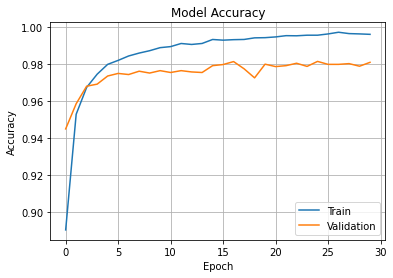

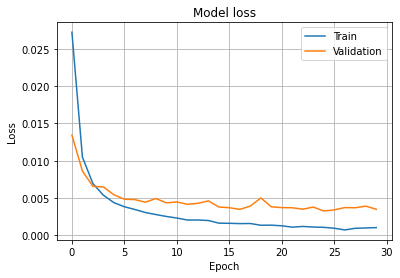

In [4]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "lower right")
plt.grid()
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.grid()
plt.show()